<a href="https://colab.research.google.com/github/joannejuneie/Prediction_of_heat_flux/blob/main/Heat_flux.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import random as rnd
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [ ]:
data_linear=pd.read_csv(r"/content/April-June_22.csv")
df=pd.DataFrame(data_linear)
print(df.shape)

(5341, 54)


In [ ]:
to_drop=['MOULD_WATER_TEMP_BACK','MOULD_WATER_TEMP_NORTH', 'MOULD_WATER_TEMP_SOUTH','MOULD_WATER_BACK','MOULD_WATER_SOUTH','MOULD_WATER_NORTH','MOULD_BACK_HEATLOSS','MOULD_SOUTH_HEATLOSS','MOULD_NORTH_HEATLOSS']
df.drop(to_drop, inplace=True, axis=1)


In [ ]:
print(df.shape)


(5341, 45)


In [ ]:
df.isnull().sum()

DATA_TIME                        0
CAP_OFF_MODE                     0
CAST_ID                          0
GRADE                            0
CARBON                           0
VANADIUM                         0
TITANIUM                         0
NIOBIUM                          0
MANGANESE                        0
PHOSPHORUS                       0
SULPHUR                          0
SILICON                          0
TUNDISH_WEIGHT                   0
TUNDISH_TEMPERATURE              0
CASTING_SPEED                    0
SLAB_WIDTH                       0
MOULD_LEVEL                      1
MOULD_WATER_FRONT                1
MOULD_WATER_TEMP_FRONT           1
WATER_INLET_TEMP                 1
MOULD_FRONT_HEATLOSS             1
RING_NARROW_FACEA_WATER_FR_PV    1
RING_NARROW_FACEB_WATER_FR_PV    1
ZONE1A_WATER_FR_PV               1
ZONE1B_WATER_FR_PV               1
ZONE2_WATER_FR_PV                1
ZONE3_WATER_FR_PV                1
ZONE4I_WATER_FR_PV               1
ZONE4O_WATER_FR_PV  

In [ ]:
df.dropna(axis=0,inplace=True,how='any')

In [ ]:
df.shape

(5340, 45)

In [ ]:
df.isnull().sum()

DATA_TIME                        0
CAP_OFF_MODE                     0
CAST_ID                          0
GRADE                            0
CARBON                           0
VANADIUM                         0
TITANIUM                         0
NIOBIUM                          0
MANGANESE                        0
PHOSPHORUS                       0
SULPHUR                          0
SILICON                          0
TUNDISH_WEIGHT                   0
TUNDISH_TEMPERATURE              0
CASTING_SPEED                    0
SLAB_WIDTH                       0
MOULD_LEVEL                      0
MOULD_WATER_FRONT                0
MOULD_WATER_TEMP_FRONT           0
WATER_INLET_TEMP                 0
MOULD_FRONT_HEATLOSS             0
RING_NARROW_FACEA_WATER_FR_PV    0
RING_NARROW_FACEB_WATER_FR_PV    0
ZONE1A_WATER_FR_PV               0
ZONE1B_WATER_FR_PV               0
ZONE2_WATER_FR_PV                0
ZONE3_WATER_FR_PV                0
ZONE4I_WATER_FR_PV               0
ZONE4O_WATER_FR_PV  

In [ ]:
df.dropna(axis=0,inplace=True,how='any')

In [ ]:
df.duplicated().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5335    False
5336    False
5337    False
5338    False
5339    False
Length: 5340, dtype: bool>

In [ ]:
df.drop_duplicates()

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION,AR_BACK_PRESSURE,AR_FLOW_RATE,AR_BACK_PRESSURE_SHROUD,AR_FLOW_SHROUD,AR_BACK_PRESSURE_PLATE,AR_FLOW_PLATE,AR_BACK_PRESSURE_NOZZLE,AR_FLOW_NOZZLE,TUND_POS
0,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,25.568,2.116,6.097,0.772,82.962,0.013,5.647,1.504,7.708,40.0
1,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,27.057,2.118,6.102,0.762,82.990,0.013,5.646,1.506,7.722,41.0
2,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.496,2.119,6.104,0.771,82.890,0.013,5.646,1.504,7.702,41.0
3,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.105,2.116,6.096,0.773,82.904,0.013,5.646,1.504,7.708,40.0
4,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,26.105,2.116,6.095,0.773,83.011,0.013,5.647,1.501,7.725,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,28.181,2.107,5.846,0.894,92.809,0.040,5.863,1.323,7.336,55.0
5336,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,28.864,2.107,5.847,0.894,92.808,0.040,5.863,1.322,7.322,55.0
5337,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,28.913,2.107,5.847,0.894,92.812,0.040,5.860,1.321,7.319,55.0
5338,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,29.133,2.107,5.845,0.893,92.826,0.041,5.867,1.320,7.322,55.0


In [ ]:
df.dtypes

DATA_TIME                         object
CAP_OFF_MODE                       int64
CAST_ID                            int64
CARBON                           float64
VANADIUM                         float64
TITANIUM                         float64
NIOBIUM                          float64
MANGANESE                        float64
PHOSPHORUS                       float64
SULPHUR                          float64
SILICON                          float64
TUNDISH_WEIGHT                   float64
TUNDISH_TEMPERATURE              float64
CASTING_SPEED                    float64
SLAB_WIDTH                       float64
MOULD_LEVEL                      float64
MOULD_WATER_FRONT                float64
MOULD_WATER_TEMP_FRONT           float64
WATER_INLET_TEMP                 float64
MOULD_FRONT_HEATLOSS             float64
RING_NARROW_FACEA_WATER_FR_PV    float64
RING_NARROW_FACEB_WATER_FR_PV    float64
ZONE1A_WATER_FR_PV               float64
ZONE1B_WATER_FR_PV               float64
ZONE2_WATER_FR_P

In [ ]:
to_drop=['DATA_TIME']
df.drop(to_drop, inplace=True, axis=1)

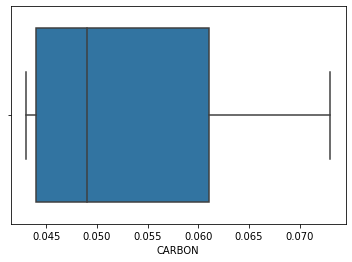

In [ ]:
sns.boxplot(x=df['CARBON'])

In [ ]:
from scipy import stats
import numpy as np


In [ ]:
from scipy.stats import zscore
df.apply(zscore)

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION_zscore,AR_BACK_PRESSURE_zscore,AR_FLOW_RATE_zscore,AR_BACK_PRESSURE_SHROUD_zscore,AR_FLOW_SHROUD_zscore,AR_BACK_PRESSURE_PLATE_zscore,AR_FLOW_PLATE_zscore,AR_BACK_PRESSURE_NOZZLE_zscore,AR_FLOW_NOZZLE_zscore,TUND_POS_zscore
0,NaN,-1.649937,0.816188,0.654838,0.748738,1.194510,-0.164276,-0.789407,0.524676,-1.364426,...,-0.938124,-0.143991,1.561774,-0.323494,-0.009358,-0.645358,-0.185133,1.689403,0.288064,-0.779427
1,NaN,-1.649937,0.816188,0.654838,0.748738,1.194510,-0.164276,-0.789407,0.524676,-1.364426,...,-0.427043,-0.104153,1.616925,-0.355474,-0.007787,-0.645358,-0.189040,1.721151,0.341555,-0.739814
2,NaN,-1.649937,0.816188,0.654838,0.748738,1.194510,-0.164276,-0.789407,0.524676,-1.364426,...,-0.619599,-0.084234,1.638985,-0.326692,-0.013399,-0.645358,-0.189040,1.689403,0.265139,-0.739814
3,NaN,-1.649937,0.816188,0.654838,0.748738,1.194510,-0.164276,-0.789407,0.524676,-1.364426,...,-0.753805,-0.143991,1.550744,-0.320296,-0.012613,-0.645358,-0.189040,1.689403,0.288064,-0.779427
4,NaN,-1.649937,0.816188,0.654838,0.748738,1.194510,-0.164276,-0.789407,0.524676,-1.364426,...,-0.753805,-0.143991,1.539713,-0.320296,-0.006608,-0.645358,-0.185133,1.641782,0.353017,-0.739814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,NaN,1.304722,1.022480,-1.963042,-0.760039,0.210904,2.408254,-1.238670,2.249902,-1.364426,...,-0.041244,-0.323263,-1.206811,0.066658,0.543291,2.367651,0.658766,-1.183754,-1.133262,-0.185243
5336,NaN,1.304722,1.022480,-1.963042,-0.760039,0.210904,2.408254,-1.238670,2.249902,-1.364426,...,0.193187,-0.323263,-1.195781,0.066658,0.543235,2.367651,0.658766,-1.199628,-1.186753,-0.185243
5337,NaN,1.304722,1.022480,-1.963042,-0.760039,0.210904,2.408254,-1.238670,2.249902,-1.364426,...,0.210005,-0.323263,-1.195781,0.066658,0.543460,2.367651,0.647045,-1.215502,-1.198215,-0.185243
5338,NaN,1.304722,1.022480,-1.963042,-0.760039,0.210904,2.408254,-1.238670,2.249902,-1.364426,...,0.285518,-0.323263,-1.217842,0.063460,0.544245,2.479244,0.674393,-1.231376,-1.186753,-0.185243


In [ ]:

for col in df:
    if col.endswith('zscore'):
        df.drop(col, inplace=True, axis=1)   

In [ ]:
for col in df:
    col_zscore = col + '_zscore'
    df[col_zscore] = (df[col] - df[col].mean())/df[col].std(ddof=0)

In [ ]:
df


,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION_zscore,AR_BACK_PRESSURE_zscore,AR_FLOW_RATE_zscore,AR_BACK_PRESSURE_SHROUD_zscore,AR_FLOW_SHROUD_zscore,AR_BACK_PRESSURE_PLATE_zscore,AR_FLOW_PLATE_zscore,AR_BACK_PRESSURE_NOZZLE_zscore,AR_FLOW_NOZZLE_zscore,TUND_POS_zscore
0,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.938124,-0.143991,1.561774,-0.323494,-0.009358,-0.645358,-0.185133,1.689403,0.288064,-0.779427
1,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.427043,-0.104153,1.616925,-0.355474,-0.007787,-0.645358,-0.189040,1.721151,0.341555,-0.739814
2,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.619599,-0.084234,1.638985,-0.326692,-0.013399,-0.645358,-0.189040,1.689403,0.265139,-0.739814
3,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.753805,-0.143991,1.550744,-0.320296,-0.012613,-0.645358,-0.189040,1.689403,0.288064,-0.779427
4,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.753805,-0.143991,1.539713,-0.320296,-0.006608,-0.645358,-0.185133,1.641782,0.353017,-0.739814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,-0.041244,-0.323263,-1.206811,0.066658,0.543291,2.367651,0.658766,-1.183754,-1.133262,-0.185243
5336,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.193187,-0.323263,-1.195781,0.066658,0.543235,2.367651,0.658766,-1.199628,-1.186753,-0.185243
5337,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.210005,-0.323263,-1.195781,0.066658,0.543460,2.367651,0.647045,-1.215502,-1.198215,-0.185243
5338,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.285518,-0.323263,-1.217842,0.063460,0.544245,2.479244,0.674393,-1.231376,-1.186753,-0.185243


In [ ]:
from scipy import stats
zscore_removed= df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION_zscore,AR_BACK_PRESSURE_zscore,AR_FLOW_RATE_zscore,AR_BACK_PRESSURE_SHROUD_zscore,AR_FLOW_SHROUD_zscore,AR_BACK_PRESSURE_PLATE_zscore,AR_FLOW_PLATE_zscore,AR_BACK_PRESSURE_NOZZLE_zscore,AR_FLOW_NOZZLE_zscore,TUND_POS_zscore
0,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.938124,-0.143991,1.561774,-0.323494,-0.009358,-0.645358,-0.185133,1.689403,0.288064,-0.779427
1,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.427043,-0.104153,1.616925,-0.355474,-0.007787,-0.645358,-0.189040,1.721151,0.341555,-0.739814
2,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.619599,-0.084234,1.638985,-0.326692,-0.013399,-0.645358,-0.189040,1.689403,0.265139,-0.739814
3,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.753805,-0.143991,1.550744,-0.320296,-0.012613,-0.645358,-0.189040,1.689403,0.288064,-0.779427
4,0,74177,0.061,0.005,0.024,0.012,0.745,0.018,0.005,0.063,...,-0.753805,-0.143991,1.539713,-0.320296,-0.006608,-0.645358,-0.185133,1.641782,0.353017,-0.739814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,-0.041244,-0.323263,-1.206811,0.066658,0.543291,2.367651,0.658766,-1.183754,-1.133262,-0.185243
5336,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.193187,-0.323263,-1.195781,0.066658,0.543235,2.367651,0.658766,-1.199628,-1.186753,-0.185243
5337,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.210005,-0.323263,-1.195781,0.066658,0.543460,2.367651,0.647045,-1.215502,-1.198215,-0.185243
5338,0,74200,0.063,0.001,0.020,0.011,0.793,0.016,0.006,0.063,...,0.285518,-0.323263,-1.217842,0.063460,0.544245,2.479244,0.674393,-1.231376,-1.186753,-0.185243


In [ ]:
from scipy import stats
df[(np.abs(stats.zscore(df)) > 3).all(axis=1)]
# all zscore values greater than 3 removed

,CAP_OFF_MODE,CAST_ID,CARBON,VANADIUM,TITANIUM,NIOBIUM,MANGANESE,PHOSPHORUS,SULPHUR,SILICON,...,STOPPER_POSITION_zscore,AR_BACK_PRESSURE_zscore,AR_FLOW_RATE_zscore,AR_BACK_PRESSURE_SHROUD_zscore,AR_FLOW_SHROUD_zscore,AR_BACK_PRESSURE_PLATE_zscore,AR_FLOW_PLATE_zscore,AR_BACK_PRESSURE_NOZZLE_zscore,AR_FLOW_NOZZLE_zscore,TUND_POS_zscore


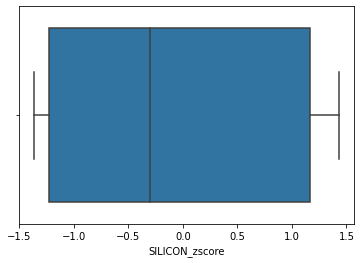

In [ ]:
sns.boxplot(x=df['SILICON_zscore'])


In [ ]:
Y = df['MOULD_FRONT_HEATLOSS']
X = df.drop('MOULD_FRONT_HEATLOSS', axis=1)

In [ ]:
# Dependent or Target Variable

Y.head()

0    1.7397
1    1.7294
2    1.7300
3    1.7200
4    1.7263
Name: MOULD_FRONT_HEATLOSS, dtype: float64

In [ ]:
## Splitting dataset into 80% Training and 20% Testing Data:

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

In [ ]:
from sklearn.linear_model import LinearRegression
ml= LinearRegression()
ml.fit(X_train,Y_train)

LinearRegression()

In [ ]:
y_pred=ml.predict(X_test)
print(y_pred)

[1.77575456 1.56438636 1.68206713 ... 1.8500279  1.87136555 1.78301279]


In [ ]:
ml.predict([[0.0000 , 74177.0000, 0.0610 , 0.0050 ,0.0240 ,0.0120,0.7450,0.0180, 0.0050, 0.0630,32.2000, 1547.0000,1.4010, 1335.0000,29.2500,4015.7570,  48.2481, 40.5313, 78.6914,480.0790, 1371.8450,1482.2270,713.4474,408.6703,697.5551,60.1044,182.6218, 0.2272, 1397.0000,255836.0000,5189.0040,166.0000,25.5680, 2.1160,6.0970,0.7720,82.9620,0.0130, 5.6470,1.5040, 7.7080,40.0000]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([1.75845413])

In [ ]:
row_1=df.iloc[0]

In [ ]:
row_1


CAP_OFF_MODE                          0.0000
CAST_ID                           74177.0000
CARBON                                0.0610
VANADIUM                              0.0050
TITANIUM                              0.0240
NIOBIUM                               0.0120
MANGANESE                             0.7450
PHOSPHORUS                            0.0180
SULPHUR                               0.0050
SILICON                               0.0630
TUNDISH_WEIGHT                       32.2000
TUNDISH_TEMPERATURE                1547.0000
CASTING_SPEED                         1.4010
SLAB_WIDTH                         1335.0000
MOULD_LEVEL                          29.2500
MOULD_WATER_FRONT                  4015.7570
MOULD_WATER_TEMP_FRONT               48.2481
WATER_INLET_TEMP                     40.5313
MOULD_FRONT_HEATLOSS                  1.7397
RING_NARROW_FACEA_WATER_FR_PV        78.6914
RING_NARROW_FACEB_WATER_FR_PV       480.0790
ZONE1A_WATER_FR_PV                 1371.8450
ZONE1B_WAT

In [ ]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.9925741555593407

Text(0.5, 1.0, 'Actual vs. Predicted')

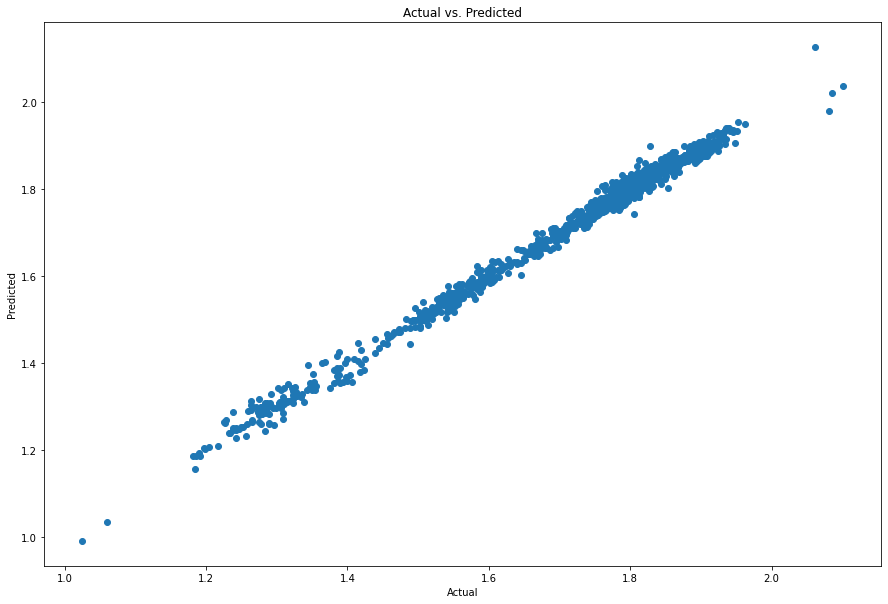

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(Y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')